In [1]:
from NLSolver import *

LM took: 0.007527351379394531


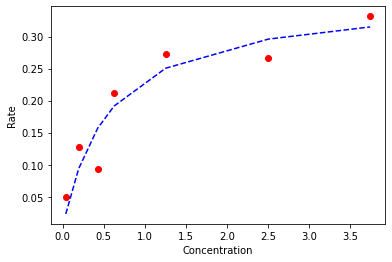

In [2]:
# Wikipedia Gauss-Newton Example, using very efficient scipy implementation

from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Data
S = np.array([0.038,0.194,0.425,0.626,1.253,2.5,3.74])
r = np.array([0.05,0.127,0.094,0.2122,0.2729,0.2665,0.3317])

# Rate equation
def rate_eq(S,Vmax,Km):
    return Vmax*S / (Km + S)

# Fit with LM in scipy

# Play with these, you will see how robust this is (its scipy, its very robust)
p0 = np.array([100,100])
t0 = time()
popt, res = curve_fit(rate_eq, S, r, p0=p0)
t1 = time()
print('LM took: %s'%(t1-t0))
err = np.sqrt(np.diag(res))
ypred = rate_eq(S,popt[0],popt[1])

# Plot result
plt.plot(S,r,'ro')
plt.plot(S,ypred,'b--')
plt.xlabel('Concentration')
plt.ylabel('Rate');

J Shape
(7, 2)
Gauss-Newton; Iteration: 0, RMSE: 0.044405257539164196
J Shape
(7, 2)
Gauss-Newton; Iteration: 1, RMSE: 0.03864028150939398
J Shape
(7, 2)
Gauss-Newton; Iteration: 2, RMSE: 0.033486869338104915
J Shape
(7, 2)
Gauss-Newton; Iteration: 3, RMSE: 0.033476334099478235
J Shape
(7, 2)
Gauss-Newton; Iteration: 4, RMSE: 0.03347495036913668
J Shape
(7, 2)
Gauss-Newton; Iteration: 5, RMSE: 0.0334749513095811
J Shape
(7, 2)
Gauss-Newton; Iteration: 6, RMSE: 0.03347494959914106
J Shape
(7, 2)
Gauss-Newton; Iteration: 7, RMSE: 0.03347494959548168
GN in Python took: 0.004952430725097656


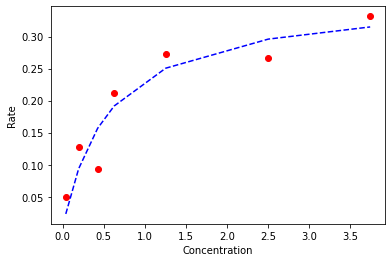

In [3]:
# Rate equation in vector form as required by above
def rate_eq(S,args):
    return args[0]*S / (args[1] + S)

# Initial parameters, try this a few times, you will see why GN has issues
B0 = np.array([0.1,0.1])

# Call solver above, actually its impressively fast even in pure Python for this case
t0 = time()
gns = NLSolver(B0, S, r, rate_eq, method='Gauss-Newton')
gns.fit()
t1 = time()
ypred = gns.predict()

# Plot result
plt.plot(S,r,'ro')
plt.plot(S,ypred,'b--')
plt.xlabel('Concentration')
plt.ylabel('Rate')

print('GN in Python took: %s'%(t1-t0))

JpI Shape
(2, 7)
Gauss-Newton; Iteration: 0, RMSE: 1.8326857365230007
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 1, RMSE: 4.783136083766759
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 2, RMSE: 1.0905963516236488
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 3, RMSE: 0.2663030863930348
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 4, RMSE: 0.2039989479012277
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 5, RMSE: 0.20080069308244083
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 6, RMSE: 0.15877760649829695
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 7, RMSE: 0.22602714106304184
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 8, RMSE: 0.14237713163944166
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 9, RMSE: 0.14017797044728614
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 10, RMSE: 0.1351561479018281
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 11, RMSE: 0.1295401785499866
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 12, RMSE: 0.1525418916331016
JpI Shape
(2, 7)
Gauss-Newton; Iteration: 13, RMSE: 0.1390592377243574
JpI Shape
(2

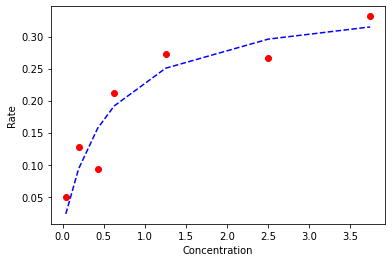

In [4]:
# Rate equation in vector form as required by above
def rate_eq(S,args):
    return args[0]*S / (args[1] + S)

# Initial parameters, try this a few times, you will see why GN has issues
B0 = np.array([10,10])

# Call solver above, actually its impressively fast even in pure Python for this case
t0 = time()
gns = NLSolver(B0, S, r, rate_eq, method='Gauss-Newton')
gns.fit()
t1 = time()
ypred = gns.predict()

# Plot result
plt.plot(S,r,'ro')
plt.plot(S,ypred,'b--')
plt.xlabel('Concentration')
plt.ylabel('Rate')

print('GN in Python took: %s'%(t1-t0))

Gauss-Newton; Iteration: 0, RMSE: 0.10274488073049046
Gauss-Newton; Iteration: 1, RMSE: 0.17284723207561975
Gauss-Newton; Iteration: 2, RMSE: 0.21624828534441098
Gauss-Newton; Iteration: 3, RMSE: 0.24113879550569253
Gauss-Newton; Iteration: 4, RMSE: 0.23636749782526284
Gauss-Newton; Iteration: 5, RMSE: 0.24119859513185102
Gauss-Newton; Iteration: 6, RMSE: 0.24125221436378855
Gauss-Newton; Iteration: 7, RMSE: 0.2412031023666356
Gauss-Newton; Iteration: 8, RMSE: 0.2412076614865925
Gauss-Newton; Iteration: 9, RMSE: 0.24125559349704395
Gauss-Newton; Iteration: 10, RMSE: 0.24130130860962198
Gauss-Newton; Iteration: 11, RMSE: 0.2412578069056418
Gauss-Newton; Iteration: 12, RMSE: 0.24126008121085613
Gauss-Newton; Iteration: 13, RMSE: 0.24087066917753372
Gauss-Newton; Iteration: 14, RMSE: 0.2405739781917658
Gauss-Newton; Iteration: 15, RMSE: 0.09311846759491346
Gauss-Newton; Iteration: 16, RMSE: 0.09311756352926939
Gauss-Newton; Iteration: 17, RMSE: 0.09311756351710386
GN in Python took: 0.004

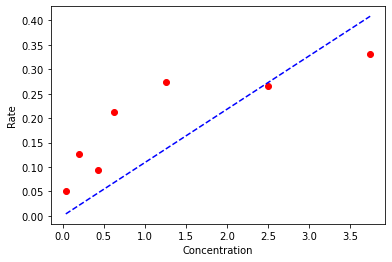

In [5]:
# Rate equation in vector form as required by above
def rate_eq(S,args):
    return args[0]*S / (args[1] + S)

# Initial parameters, try this a few times, you will see why GN has issues
B0 = np.array([0.01,0.01])

# Call solver above, actually its impressively fast even in pure Python for this case
t0 = time()
gns = NLSolver(B0, S, r, rate_eq, method='Gauss-Newton')
gns.fit()
t1 = time()
ypred = gns.predict()

# Plot result
plt.plot(S,r,'ro')
plt.plot(S,ypred,'b--')
plt.xlabel('Concentration')
plt.ylabel('Rate')

print('GN in Python took: %s'%(t1-t0))

In [6]:
r = gns.compute_residual(r, rate_eq, S, B0)
r

array([0.04208333, 0.1174902 , 0.08422989, 0.20235723, 0.26297918,
       0.25653984, 0.32172667])

In [7]:
B1 = B0 + 1e-6
J = gns.compute_jacobian(S, B1, B0, rate_eq, r)
J

array([[ 0.79166667, -0.16492712],
       [ 0.95098039, -0.04661646],
       [ 0.97701149, -0.02245998],
       [ 0.98427673, -0.01547602],
       [ 0.99208234, -0.00785496],
       [ 0.99601594, -0.00396819],
       [ 0.99733333, -0.00265955]])

In [8]:
JpI = gns.compute_pseudoinverse(J)
JpI

array([[-0.0941431 ,  0.12722711,  0.17105166,  0.18366677,  0.1974068 ,
         0.20440426,  0.20675875],
       [-6.16663469, -0.58945405,  0.53897916,  0.86481067,  1.22017176,
         1.40133224,  1.46231593]])

In [9]:
JpI @ r

array([0.23343156, 1.04247457])

In [10]:
B2 = B1 - JpI @ r
B2

array([-0.22343056, -1.03247357])